In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/Users/oluwatofunmifak-adeniyi/Downloads/Online_Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# EXPLORATORY DATA ANALYSIS

In [ ]:
#Separating negative Quantity
df = df[df["Quantity"] > 0]
df.head()

,InvoiceNo,StockCode,Products,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Products     530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
 8   Sales        530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.4+ MB


In [ ]:
#Separating Negative UnitPrice
df = df[df["UnitPrice"] > 0]
df.head()

,InvoiceNo,StockCode,Products,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Checking for duplicates
df.duplicated().sum()

5226

In [ ]:
#Dropping Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Checking for Missing Values
df.isna().sum()

InvoiceNo           0
StockCode           0
Products            0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
Sales               0
dtype: int64

In [ ]:
df["CustomerID"].value_counts()

CustomerID
17841.0    7676
14911.0    5670
14096.0    5111
12748.0    4412
14606.0    2677
           ... 
16765.0       1
13302.0       1
13270.0       1
16148.0       1
17846.0       1
Name: count, Length: 4338, dtype: int64

In [ ]:
#Filling Missing values
df["CustomerID"].ffill(inplace = True)

# Convert CustomerID to integer
df["CustomerID"] = df["CustomerID"].astype(int)


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales
count,524878.000000,524878,524878.000000,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15282.826356,20.275399
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 12:13:00,1.250000,13798.000000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,15159.000000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,16809.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,156.280031,NaN,36.093028,1736.146519,271.693566


# FEATURE ENGINEERING

In [44]:
# Extract Year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year

# Group by Year and Sum of Sales
yearly_trends = df.groupby('Year')['Sales'].sum().reset_index()
yearly_trends

,Year,Sales
0,2010,821452.730
1,2011,9820658.074


In [46]:
# Extract Quarter from InvoiceDate

df['Quarter'] = df['InvoiceDate'].dt.quarter

#Group By Quarter and Sum of Sales
quarter_trends = df.groupby("Quarter")["Sales"].sum().reset_index()
quarter_trends = quarter_trends.sort_values(by = "Quarter")
quarter_trends


,Quarter,Sales
0,1,1928572.430
1,2,2066812.111
2,3,2532352.693
3,4,4114373.570


In [54]:
# Extract Month Name
df['Month'] = df['InvoiceDate'].dt.month

# Define the correct month order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Group by Month and Sum of Sales
monthly_trends = df.groupby('Month')['Sales'].sum().reset_index()
monthly_trends = monthly_trends.sort_values(by = "Month")
monthly_trends


,Month,Sales
0,1,689811.610
1,2,522545.560
2,3,716215.260
3,4,536968.491
4,5,769296.610
5,6,760547.010
6,7,718076.121
7,8,757841.380
8,9,1056435.192
9,10,1151263.730


In [62]:
# Extract the Days of the week
df['Days_of_Week'] = df['InvoiceDate'].dt.day_name()

# Define correct order of days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'Days_of_Week' to categorical with correct order
df['Days_of_Week'] = pd.Categorical(df['Days_of_Week'], categories=days_order, ordered=True)

days_of_week_trends = df.groupby('Days_of_Week')['Sales'].sum().reset_index()
days_of_week_trends = days_of_week_trends.sort_values(by = "Days_of_Week")
days_of_week_trends

,Days_of_Week,Sales
0,Monday,1775782.071
1,Tuesday,2175700.511
2,Wednesday,1847074.380
3,Thursday,2199292.570
4,Friday,1837470.491
5,Saturday,0.000
6,Sunday,806790.781


In [94]:
# Create period of day
def get_period_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Extract period of day
df['Period_of_Day'] = df['InvoiceDate'].dt.hour.apply(get_period_of_day)

In [96]:
# Define the correct order of periods
period_order = ["Morning", "Afternoon", "Evening", "Night"]

# Ensure 'Period' is a categorical variable with the correct order
df['Period_of_Day'] = pd.Categorical(df['Period_of_Day'], categories=period_order, ordered=True)

# Calculate total sales per period
period_trends = df.groupby('Period_of_Day')['Sales'].sum().reset_index()
period_trends = period_trends.sort_values(by='Period_of_Day')
period_trends

,Period_of_Day,Sales
0,Morning,3986257.192
1,Afternoon,5981248.651
2,Evening,655772.481
3,Night,18832.480


# PURCHASE TRENDS

## Daily Purchase Trend

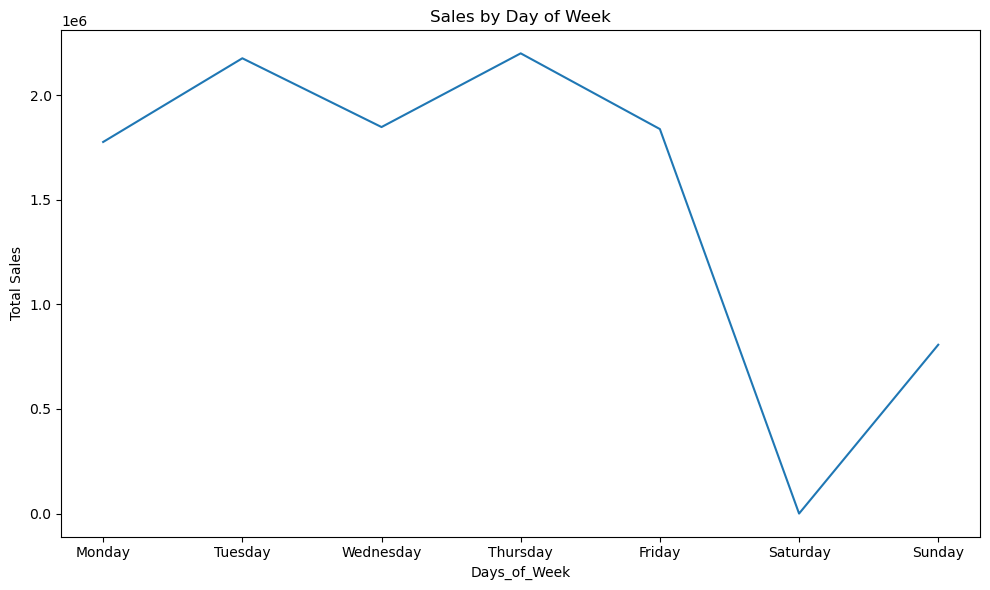

In [148]:
# Sales by day of week
sales_by_day = df.groupby("Days_of_Week")['Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 
                                                             'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='line')
plt.title('Sales by Day of Week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Period of Day Trend

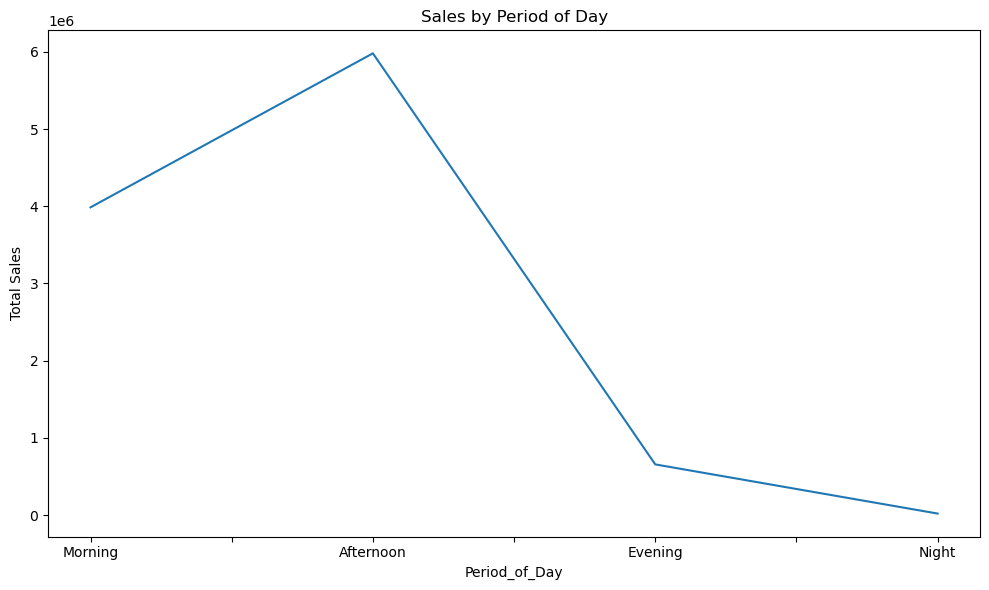

In [146]:
# Sales by period of day
sales_by_period = df.groupby('Period_of_Day')['Sales'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
plt.figure(figsize=(10, 6))
sales_by_period.plot(kind='line')
plt.title('Sales by Period of Day')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Quarterly Trend

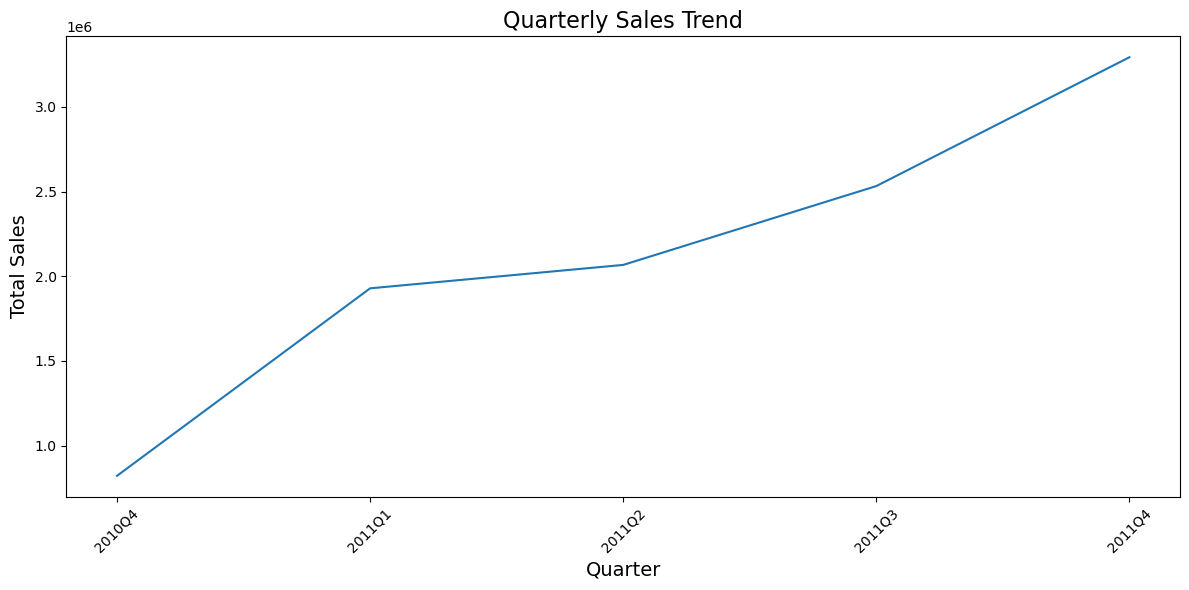

In [177]:
# Quarterly Trend
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Sales'])
plt.title('Quarterly Sales Trend', fontsize=16,)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 # MONTHLY TREND

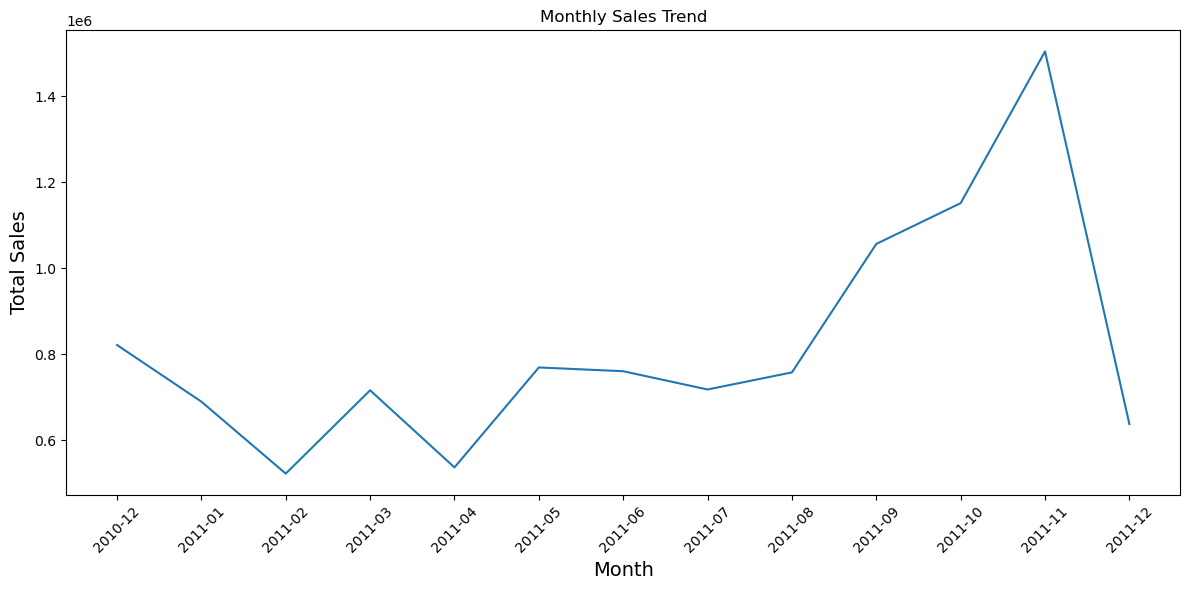

In [144]:
# Monthly sales trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'])
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.show()


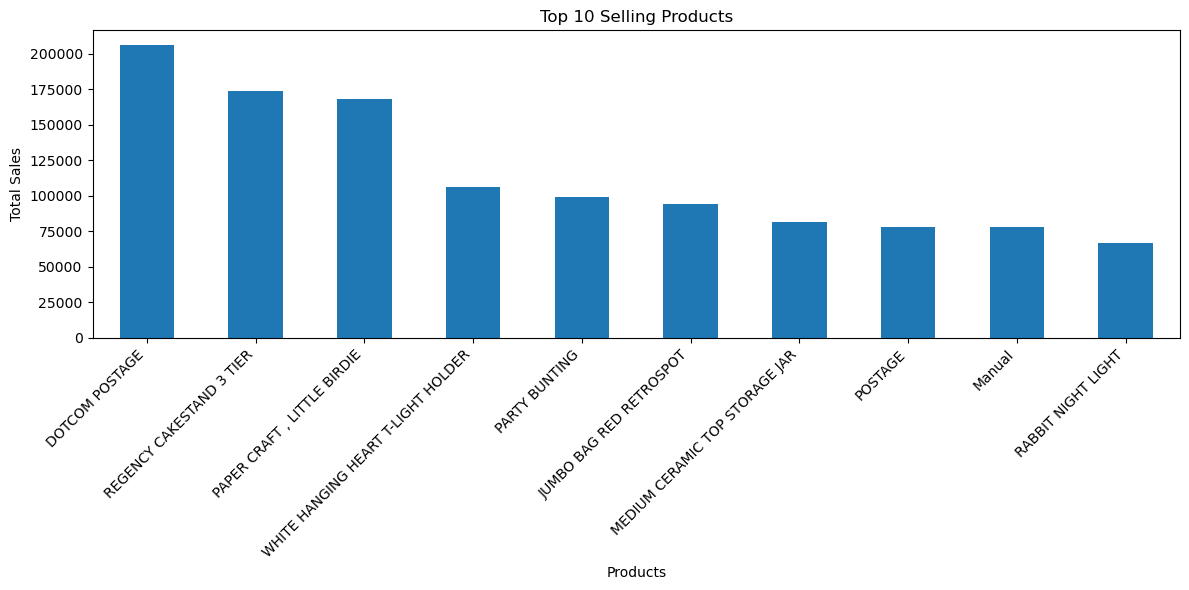

In [162]:
# Top 10 selling products
top_products = df.groupby('Products')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

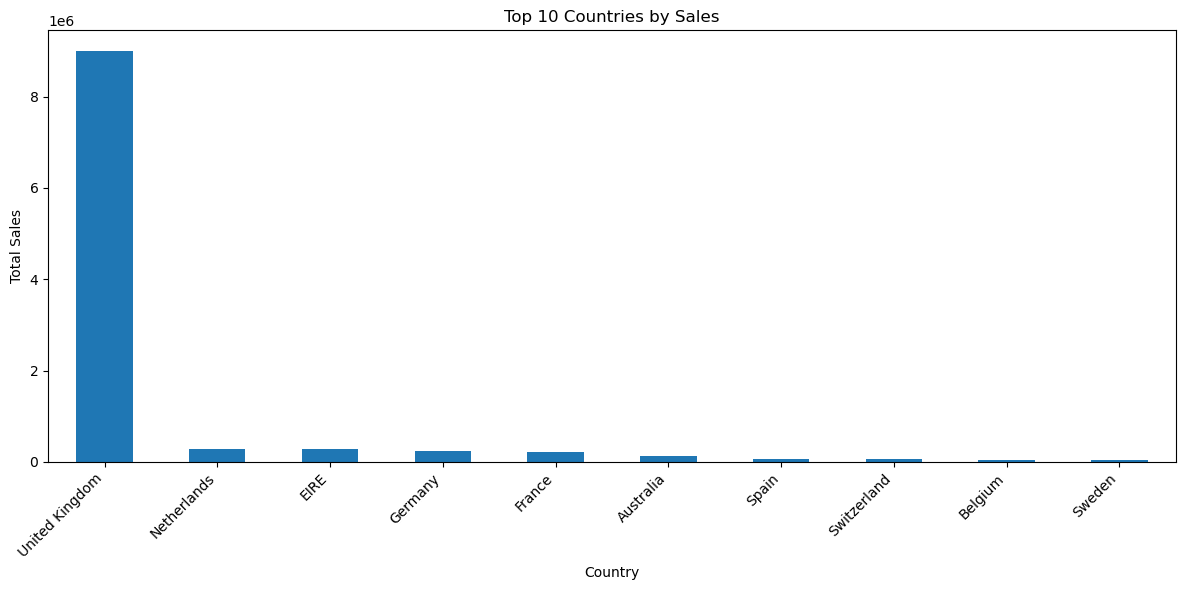

In [ ]:
# Sales by country
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# CLUSTERING ANALYSIS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Prepare data for clustering
# Let's create RFM (Recency, Frequency, Monetary) metrics

# Set the last date to be the max date in the dataset plus 1 day
last_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [ ]:
# Group by CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Sales': 'sum'  # Monetary
})

In [ ]:
# Rename the columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Remove any null values
rfm = rfm.dropna()

# Log transform monetary value to reduce skewness
rfm['Monetary'] = np.log1p(rfm['Monetary'])

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


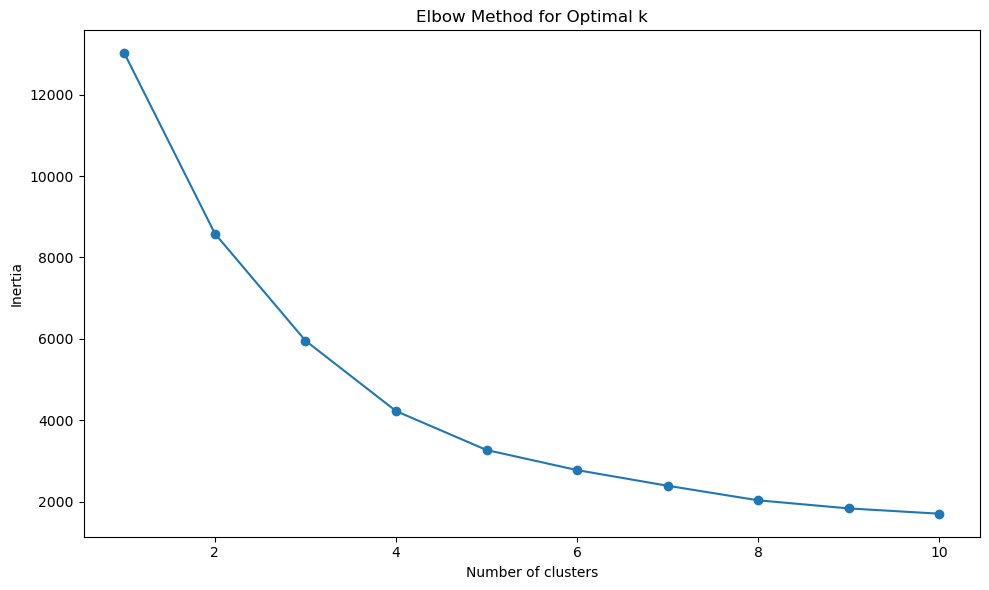

In [ ]:
# Determine optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

In [ ]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze clusters
cluster_stats = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': lambda x: np.exp(x.mean()) - 1  # Convert back from log
}).round(2)

print(cluster_stats)

         Recency  Frequency  Monetary
Cluster                              
0          50.37       2.66    587.20
1          27.85      12.65   5171.81
2         251.54       1.58    303.21


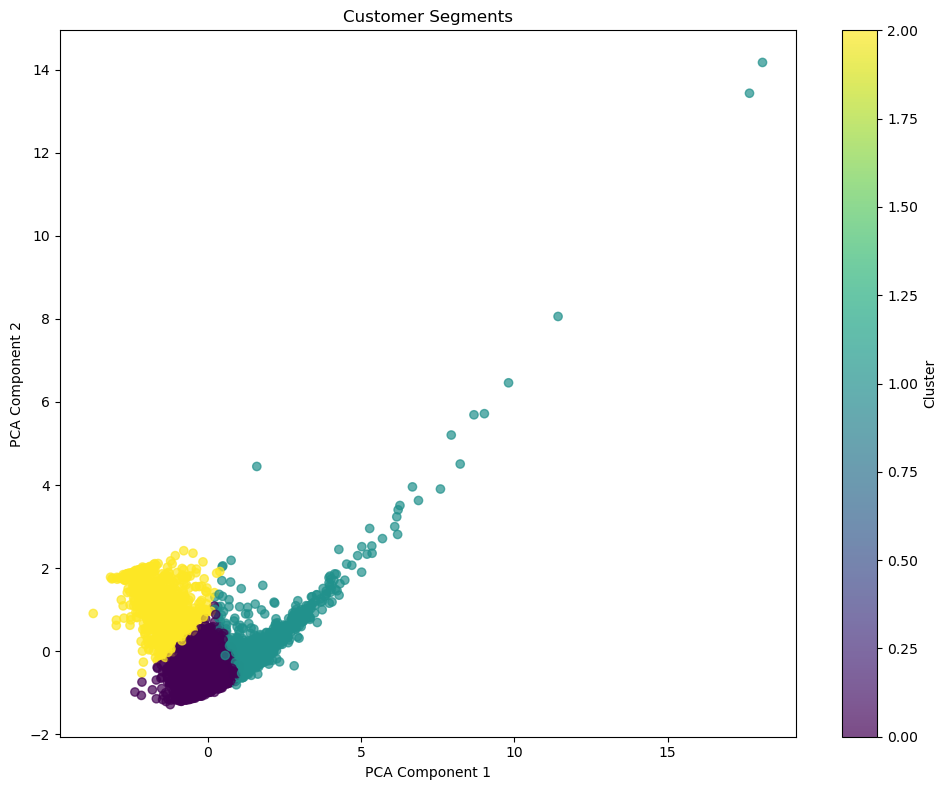

In [ ]:
# Visualize clusters
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# PREDICTIVE CLASSIFICATION MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Classify high-value vs. low-value customers
# Define high-value customers (top 20%)
rfm['Value'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])
rfm['High_Value'] = rfm['Value'].apply(lambda x: 1 if x >= 4 else 0)

# Features and target
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['High_Value']


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00       524

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302



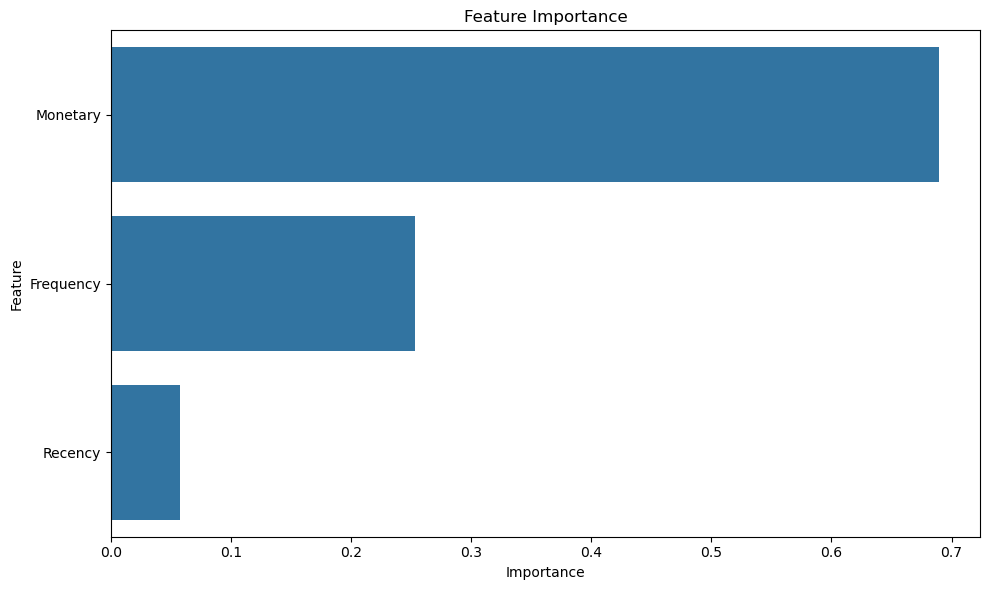

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# SALES FORECASTING MODEL

## Time series forecasting

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


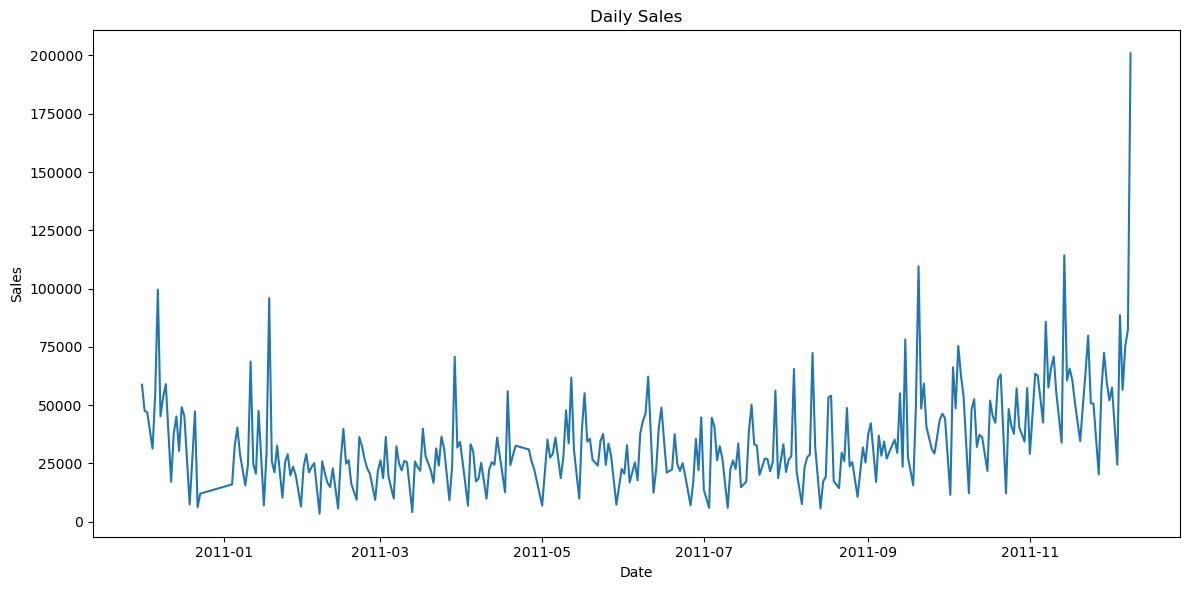

In [ ]:
# Prepare daily sales data for forecasting
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['ds'], daily_sales['y'])
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


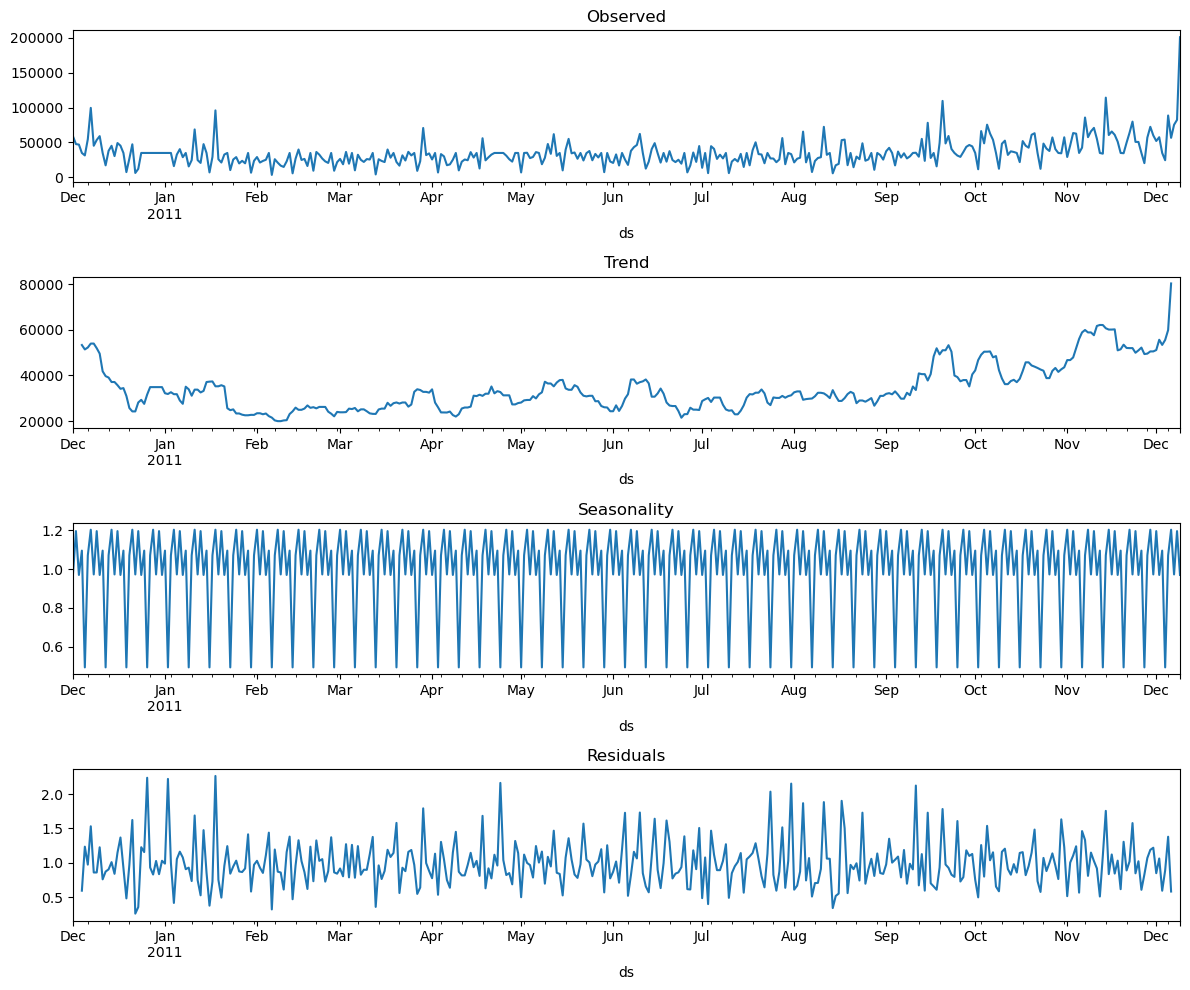

In [ ]:
# Check for seasonality
try:
    # Resample to get continuous daily data
    ts = daily_sales.set_index('ds')['y']
    ts = ts.asfreq('D', fill_value=ts.mean())
    
    # Decompose the time series
    decomposition = seasonal_decompose(ts, model='multiplicative', period=7)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
    decomposition.observed.plot(ax=ax1)
    ax1.set_title('Observed')
    decomposition.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonality')
    decomposition.resid.plot(ax=ax4)
    ax4.set_title('Residuals')
    plt.tight_layout()
    plt.show()
except:
    print("Could not perform seasonal decomposition - may need more data or regular intervals")


04:22:49 - cmdstanpy - INFO - Chain [1] start processing
04:22:53 - cmdstanpy - INFO - Chain [1] done processing


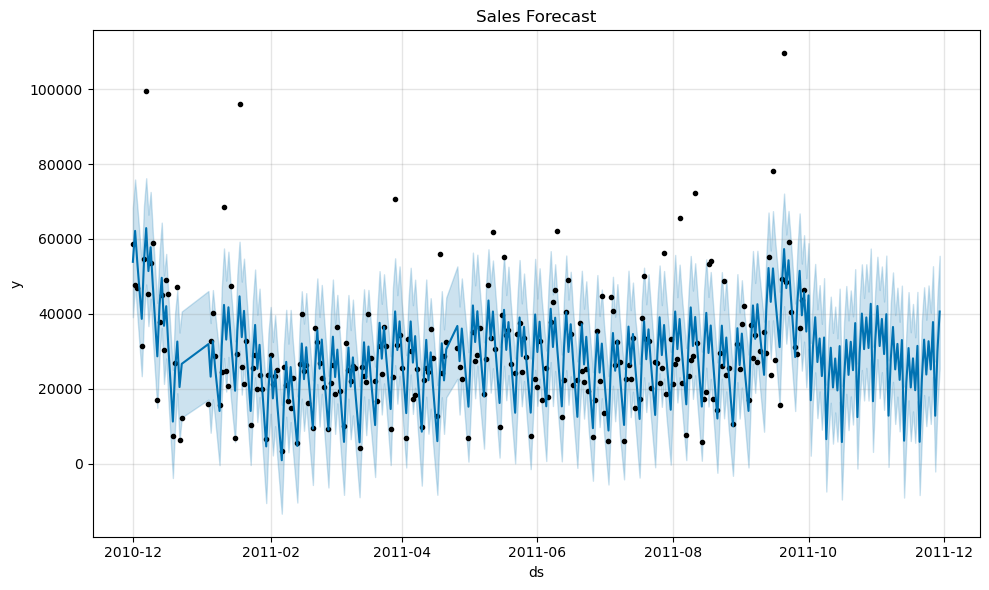

In [ ]:
# Implement Prophet model for forecasting
# Split data into train and test
train_size = int(len(daily_sales) * 0.8)
train = daily_sales[:train_size]
test = daily_sales[train_size:]

# Train Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)
model.fit(train)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Sales Forecast')
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on test data
y_true = test['y'].values
y_pred = forecast.tail(len(test))['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

Mean Absolute Error: 29795.42
Root Mean Squared Error: 38541.59
Mean Absolute Percentage Error: 53.57%


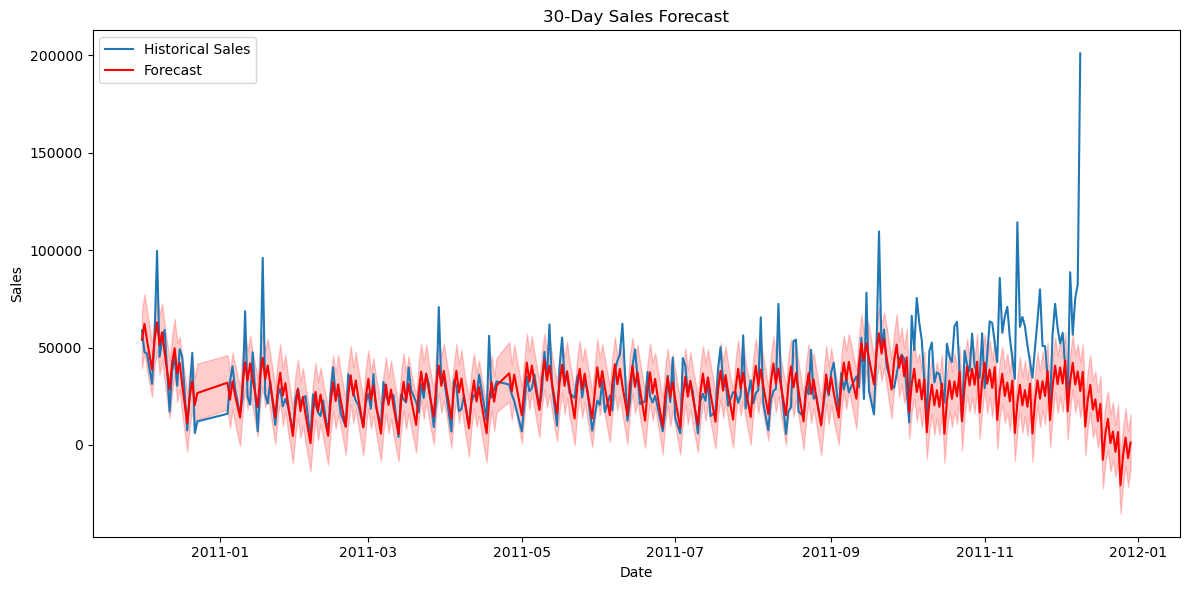

In [ ]:
# Forecast for next 30 days
future_extended = model.make_future_dataframe(periods=len(test) + 30)
forecast_extended = model.predict(future_extended)

# Plot extended forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['ds'], daily_sales['y'], label='Historical Sales')
plt.plot(forecast_extended['ds'], forecast_extended['yhat'], color='red', label='Forecast')
plt.fill_between(
    forecast_extended['ds'],
    forecast_extended['yhat_lower'],
    forecast_extended['yhat_upper'],
    color='red',
    alpha=0.2
)
plt.title('30-Day Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


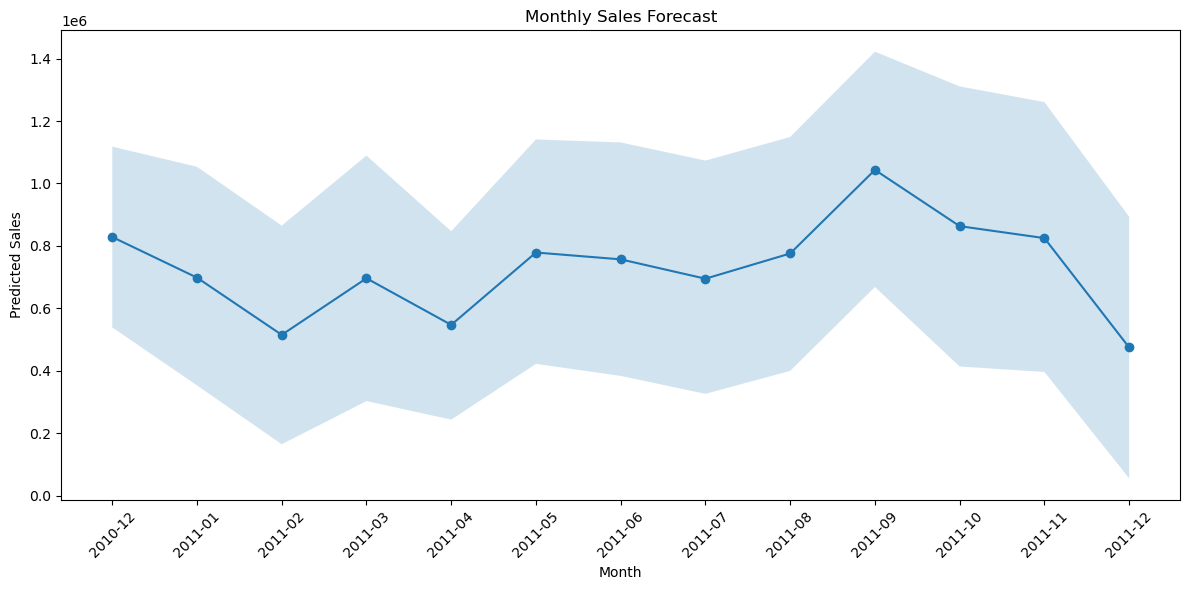

In [ ]:
# Create monthly forecast for business planning
forecast_extended['Month'] = forecast_extended['ds'].dt.to_period('M')
monthly_forecast = forecast_extended.groupby('Month').agg({
    'yhat': 'sum',
    'yhat_lower': 'sum',
    'yhat_upper': 'sum'
}).reset_index()
monthly_forecast['Month'] = monthly_forecast['Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_forecast['Month'], monthly_forecast['yhat'], marker='o')
plt.fill_between(
    range(len(monthly_forecast)),
    monthly_forecast['yhat_lower'],
    monthly_forecast['yhat_upper'],
    alpha=0.2
)
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Predicted Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CUSTOMER SEGMENTATION REPORT

## Based on clustering results

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Analyze each cluster in detail

def analyze_customer_segments(rfm):
    # Convert Monetary back from log if needed
    if rfm['Monetary'].max() < 30:  # Check if it's log-transformed
        rfm['Monetary_Value'] = np.exp(rfm['Monetary']) - 1
    else:
        rfm['Monetary_Value'] = rfm['Monetary']
        
    # Create cluster profile
    cluster_profile = rfm.groupby('Cluster').agg({
        'Recency': ['mean', 'median', 'min', 'max'],
        'Frequency': ['mean', 'median', 'min', 'max'],
        'Monetary_Value': ['mean', 'median', 'min', 'max', 'count']
    })

In [ ]:
# Calculate percentage of customers in each cluster
total_customers = rfm.shape[0]
cluster_sizes = rfm['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_sizes / total_customers * 100).round(2)

# Calculate means for numeric columns
numeric_columns = rfm.select_dtypes(include=['number']).columns.tolist()
if 'Cluster' in numeric_columns:
    numeric_columns.remove('Cluster')
cluster_means = rfm.groupby('Cluster')[numeric_columns].mean()

#create a simple dictionary with default names
segment_names = {}
for i in cluster_sizes.index:
    segment_names[i] = f"Segment {i}"

# create the segment summary
monetary_col = 'Monetary_Value' if 'Monetary_Value' in cluster_means.columns else 'Monetary'

segment_summary = pd.DataFrame({
    'Segment Name': [segment_names[i] for i in cluster_sizes.index],
    'Count': cluster_sizes.values,
    'Percentage': cluster_percentages.values,
    'Avg. Recency (days)': cluster_means['Recency'].values,
    'Avg. Frequency': cluster_means['Frequency'].values,
    'Avg. Monetary': cluster_means[monetary_col].values
}, index=cluster_sizes.index)

# Add the segment names to the original dataframe
rfm['Segment'] = rfm['Cluster'].map(segment_names)

# Display the summary
print(segment_summary)

        Segment Name  Count  Percentage  Avg. Recency (days)  Avg. Frequency  \
Cluster                                                                        
0          Segment 0   2369       54.61            50.367666        2.660616   
1          Segment 1    953       21.97            27.846800       12.649528   
2          Segment 2   1016       23.42           251.537402        1.576772   

         Avg. Monetary  
Cluster                 
0             6.377070  
1             8.551172  
2             5.717725  


In [ ]:
# Assign segment names based on normalized values
segment_names = {}
    
for cluster in normalized_means.index:
        rec = normalized_means.loc[cluster, 'Recency']
        freq = normalized_means.loc[cluster, 'Frequency']
        mon = normalized_means.loc[cluster, 'Monetary']
        
# Create segment name based on RFM values
if rec < 0 and freq > 0 and mon > 0:
            name = "Champions"
elif rec < 0 and freq > 0 and mon < 0:
            name = "Loyal Customers"
elif rec > 0 and freq > 0 and mon > 0:
            name = "Potential Loyalists"
elif rec < 0 and freq < 0 and mon > 0:
            name = "Big Spenders"
elif rec > 1:  # Very high recency (less recent)
            name = "At Risk/Dormant"
elif freq < -0.5 and mon < -0.5:
            name = "Need Attention"
else:
            name = f"Segment {cluster}"
            
segment_names[cluster] = name

In [ ]:
# Define segment names based on RFM characteristics
segment_names = {}
for cluster in cluster_sizes.index:
    r_score = cluster_means.loc[cluster, 'Recency']  # Lower is better
    f_score = cluster_means.loc[cluster, 'Frequency']  # Higher is better
    m_score = cluster_means.loc[cluster, monetary_col]  # Higher is better
    
    # Set thresholds relative to your data
    r_threshold = cluster_means['Recency'].median()
    f_threshold = cluster_means['Frequency'].median()
    m_threshold = cluster_means[monetary_col].median()
    
    if r_score < r_threshold and f_score > f_threshold and m_score > m_threshold:
        segment_names[cluster] = "High-Value Customers"
    elif r_score < r_threshold and f_score > f_threshold and m_score <= m_threshold:
        segment_names[cluster] = "Loyal Customers"
    elif r_score < r_threshold and f_score <= f_threshold:
        segment_names[cluster] = "Potential Loyalists"
    elif r_score > r_threshold and f_score > f_threshold:
        segment_names[cluster] = "At-Risk Customers"
    elif r_score > r_threshold and f_score <= f_threshold:
        segment_names[cluster] = "Churned Customers"
    else:
        segment_names[cluster] = f"Segment {cluster}"

In [ ]:
def generate_description(recency, frequency, monetary, segment_name):
    if recency < 30 and frequency > 5:
        return f"{segment_name} are engaged and recent customers."
    elif recency > 90 and frequency < 2:
        return f"{segment_name} are at risk of churning."
    else:
        return f"{segment_name} have moderate engagement."

In [ ]:
def generate_recommendations(segment_name, recency, frequency, monetary):
    """
    Generate recommendations based on RFM values.
    """
    if recency < 30 and frequency > 5:
        return f"{segment_name}: Offer loyalty rewards, exclusive discounts, or VIP programs to retain these highly engaged customers."
    
    elif recency > 90 and frequency < 2:
        return f"{segment_name}: Re-engage with personalized emails, limited-time offers, or feedback surveys to bring them back."
    
    elif frequency > 5 and monetary > cluster_means['Monetary'].mean():
        return f"{segment_name}: Upsell higher-value products or subscription plans to maximize revenue."
    
    elif recency > 180:
        return f"{segment_name}: Send reactivation campaigns, abandoned cart emails, or special comeback offers to win them back."
    
    else:
        return f"{segment_name}: Maintain engagement with regular communication, targeted ads, and special offers."

In [ ]:
# Add detailed descriptions based on segment characteristics
segment_descriptions = {
    cluster: generate_description(
        cluster_means.loc[cluster, 'Recency'],
        cluster_means.loc[cluster, 'Frequency'],
        cluster_means.loc[cluster, monetary_col],
        segment_names[cluster]
    ) for cluster in cluster_sizes.index
}

# Add recommendations for each segment
segment_recommendations = {
    cluster: generate_recommendations(
        segment_names[cluster],
        cluster_means.loc[cluster, 'Recency'],
        cluster_means.loc[cluster, 'Frequency'],
        cluster_means.loc[cluster, monetary_col]
    )
    for cluster in cluster_sizes.index
}

# Enhanced segment summary
segment_summary = pd.DataFrame({
    'Segment Name': [segment_names[i] for i in cluster_sizes.index],
    'Count': cluster_sizes.values,
    'Percentage': cluster_percentages.values,
    'Avg. Recency (days)': cluster_means['Recency'].values,
    'Avg. Frequency': cluster_means['Frequency'].values,
    'Avg. Monetary': cluster_means[monetary_col].values,
    'Description': [segment_descriptions[i] for i in cluster_sizes.index],
    'Recommended Strategy': [segment_recommendations[i] for i in cluster_sizes.index]
}, index=cluster_sizes.index)

In [ ]:
rfm['Segment'] = rfm['Cluster'].map(segment_names)

In [ ]:

print("Unique Clusters in Data:", rfm['Cluster'].unique())
print("Defined Segment Names:", segment_names)

Unique Clusters in Data: [1 0 2]
Defined Segment Names: {0: 'Segment 0', 1: 'High-Value Customers', 2: 'Churned Customers'}


In [ ]:
# Rename Segment 0
segment_names[0] = "Other Customers"  

In [ ]:
rfm['Segment'] = rfm['Cluster'].map(segment_names).fillna("Uncategorized Segment")

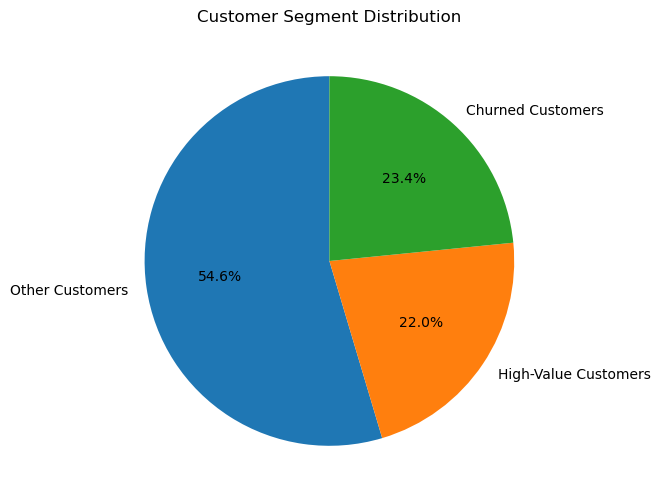

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(cluster_percentages, labels=[segment_names.get(i, f"Segment {i}") for i in cluster_sizes.index], 
        autopct='%1.1f%%', startangle=90)
plt.title('Customer Segment Distribution')
plt.show()